In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import multiply
from numpy.linalg import inv

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
xs = [i for i in range(1150, 1600)]
df = pd.read_csv('quasar_train.csv', delimiter=';')
df.columns = xs

In [3]:
df_test = pd.read_csv('quasar_test.csv', delimiter=',')
df_test.columns = xs

In [4]:
df[1151][0]

1.9099999999999999

In [5]:
first_row = df.iloc[0].tolist()

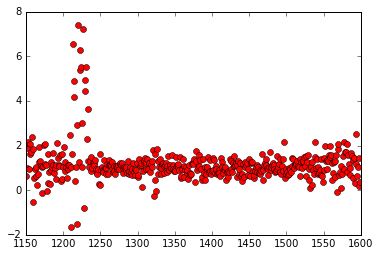

In [6]:
plt.plot(xs, first_row, 'ro')
plt.show()

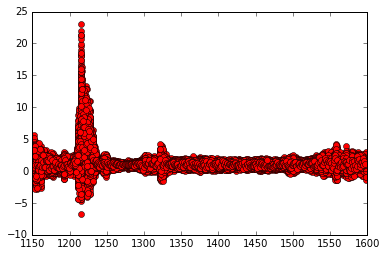

In [7]:
rows = [df.iloc[i] for i in range(len(df))]
[plt.plot(xs, r, 'ro') for r in rows]
plt.show()

In [8]:
test_rows = [df_test.iloc[i] for i in range(len(df_test))]

In [9]:
m, b = np.polyfit(xs, first_row, 1)
plt.plot(xs, first_row, 'go')
plt.plot(xs, m * np.array(xs) + b, 'r-')
plt.show()

NameError: name 'first_row' is not defined

In [21]:
def weight(x, tau):
    acc = []
    for i in range(len(xs)):
        w = np.e ** (-(x - xs[i]) ** 2 / (2 * tau ** 2))
        if w < 5e-100:
            w = 5e-100
        acc.append(w)
    return acc

In [22]:
def vector_to_diag_matrix(vector):
    return np.array([[vector[i] if i==j else 0  for j in range(len(vector))] for i in range(len(vector))])

In [23]:
def T(A):
    return np.transpose(A)

In [24]:
def thetas(row, x, tau):
    X = [(1, i) for i in xs]
    w = vector_to_diag_matrix(weight(x, tau))
    inver = inv(T(X).dot(w).dot(X))
    return inver.dot(T(X)).dot(w).dot(row)

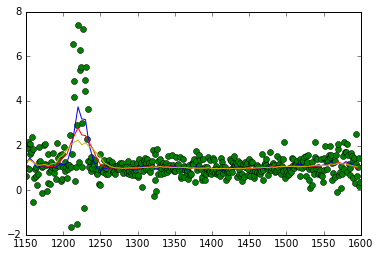

In [29]:
plt.plot(xs, first_row, 'go')

colors = ['b', 'r', 'y']
taus = [5, 10, 15]
for j in range(len(taus)):
    xses = []
    yses = []
    for i in range(1150, 1600, 5):
        b, a = thetas(first_row, i, taus[j])
        y = b + a * i
        xses.append(i)
        yses.append(y)

    plt.plot(xses, yses, colors[j] + '-')
    
plt.show()

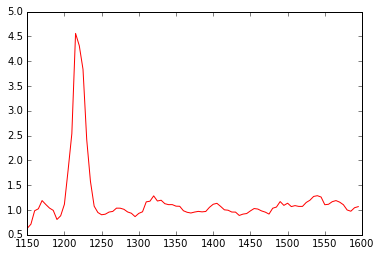

In [40]:
def smoothed_spectra(row_index):
    res = []
    tau = 5
    for i in range(1150, 1600, 5):
        b, a = thetas(rows[row_index], i, tau)
        y = b + a * i
        res.append((i, y))
    return res
    

x, y = zip(*smoothed_spectra(3))
plt.plot(x, y, 'r-')